<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Colab" data-toc-modified-id="Colab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Colab</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Loading" data-toc-modified-id="Loading-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading</a></span><ul class="toc-item"><li><span><a href="#extra-one-hot-features" data-toc-modified-id="extra-one-hot-features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>extra one-hot features</a></span></li><li><span><a href="#extra-keywords" data-toc-modified-id="extra-keywords-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>extra keywords</a></span></li></ul></li><li><span><a href="#BERT" data-toc-modified-id="BERT-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>BERT</a></span></li></ul></div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TextCNN" data-toc-modified-id="TextCNN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>TextCNN</a></span><ul class="toc-item"><li><span><a href="#notes:" data-toc-modified-id="notes:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>notes:</a></span></li></ul></li><li><span><a href="#LSTM" data-toc-modified-id="LSTM-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LSTM</a></span></li></ul></div>

# Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/Text-Classification/code")
!pip install pyLDAvis
!pip install gensim
!pip install pandas==1.3.0

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import 

In [2]:
from classification_utils import *
from clustering_utils import *
from eda_utils import *
from nn_utils_keras import *
from feature_engineering_utils import *
from data_utils import *
import warnings 
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


# Loading

In [3]:
train, test = load_data(only_stem_voc=False, sample50=False)
# train, upsampling_info = upsampling_train(train)
# train_text, train_label = train_augmentation(train, select_comb=[['text']])
# train_text, train_label = train_augmentation(train, select_comb=[['reply', 'reference_one', 'reference_two']])
train_text, train_label = train_augmentation(train, select_comb=[[ 'Organization', 'Subject', 'reply', 'reference_one']])
# train_text, train_label = train['text'], train['label']
# test_text, test_label = test['text'], test['label']
test_text, test_label = test[[ 'Organization', 'Subject', 'reply', 'reference_one']].apply(lambda x: " ".join(x), axis=1), test['label']


# test_text = test_text.apply(lambda x: extract_stem_voc(x))
# train_text = train_text.apply(lambda x: extract_stem_voc(x))
# train_text.to_csv("stem_voc_train.csv")
# test_text.to_csv("stem_voc_test.csv")

# train_text, test_text = load_stem_voc()
train_text.sample(5).tolist()


may use cols: 
 ['global_index', 'doc_path', 'label', 'reply', 'reference_one', 'reference_two', 'tag_reply', 'tag_reference_one', 'tag_reference_two', 'Subject', 'From', 'Lines', 'Organization', 'contained_emails', 'long_string', 'text', 'error_message']
combination 1 train:  ['Organization', 'Subject', 'reply', 'reference_one']


['Dept. Of Control, Teknikum, Uppsala Re: 18 Israelis murdered in March well , ok. let\'s see what Master of Wisdom, Mr. Jonas Flygare, wrote that can be wisdomely responded to : Are you calling names, or giving me a title? If the first, read your paragraph above, if not I accept the title, in order to let you get into the um, well, debate again. Master of Wisdom writes in So what do you expect me to tell you to tell you, Master of Wsidom, If you insist on giving me names/titles I did not ask for you could at least spell them correctly. /sigh. when you are intentionally neglecting the MOST important fact that the whole israeli presence in the occupied territories is ILLEGITIMATE, and hence ALL their actions, their courts, their laws are illegitimate on the ground of occupied territories. No, I am _not_ neglecting that, I\'m merely asking you whether the existance of Israeli citicens in the WB or in Gaza invalidates those individuals right to live, a human right. We can get back to the 

In [4]:
####################################
### label mapper
####################################
labels = sorted(train_label.unique())
label_mapper = dict(zip(labels, range(len(labels))))
train_label = train_label.map(label_mapper)
test_label = test_label.map(label_mapper)
y_train = train_label
y_test = test_label

print(train_text.shape)
print(test_text.shape)
print(train_label.shape)
print(test_label.shape)
print(labels)

(11083,)
(7761,)
(11083,)
(7761,)
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


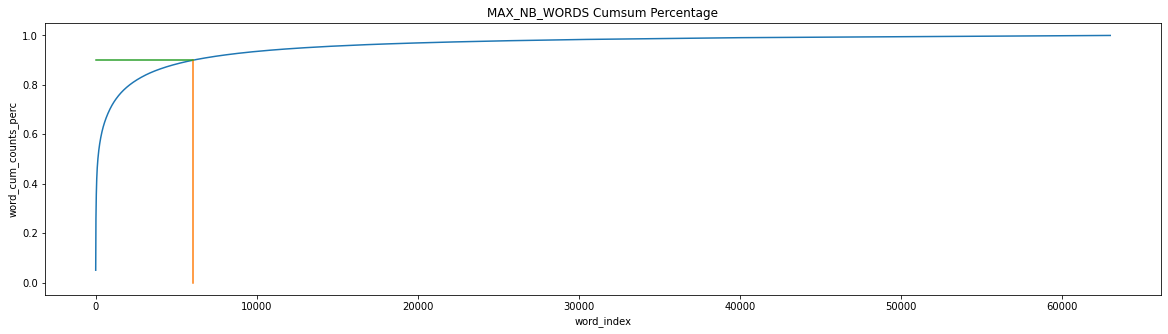

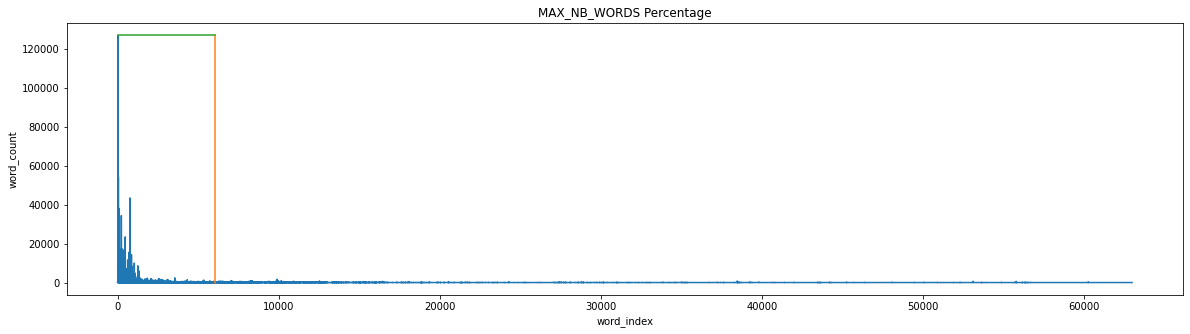

Cut index with 90.0 % of corpus:  6046 

    index  word   count
0      33   the  127048
1      37    to   64112
2      16    of   60615
3      50     a   54420
4      27   and   50867
5     764     i   43491
6      69    is   38226
7      34    in   37254
8     233  that   34398
9      48    it   29316
10     87   for   24784
11    476   you   23470
12     56    on   17639
13    251  this   17541
14    399    be   16808
15     49     s   16735
16     31   are   16388
17    765  have   15800
18    706   not   15581
19     60  with   15162
extreme frequent words:    word   count
16   of   60615
27  and   50867
33  the  127048
37   to   64112
50    a   54420


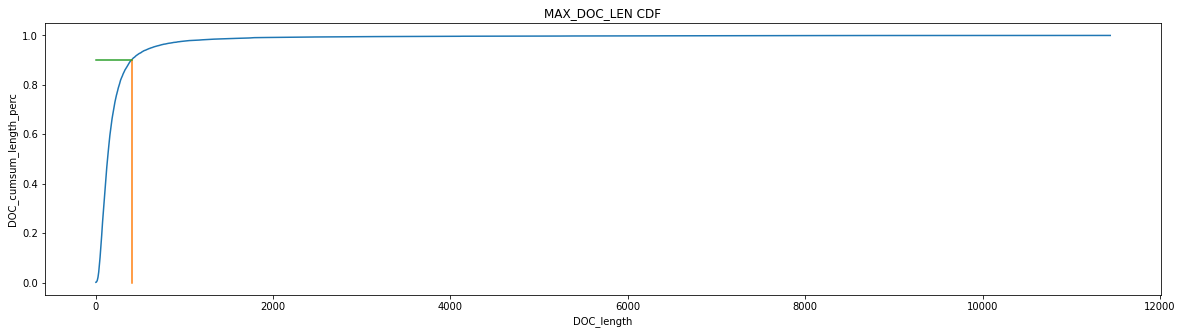

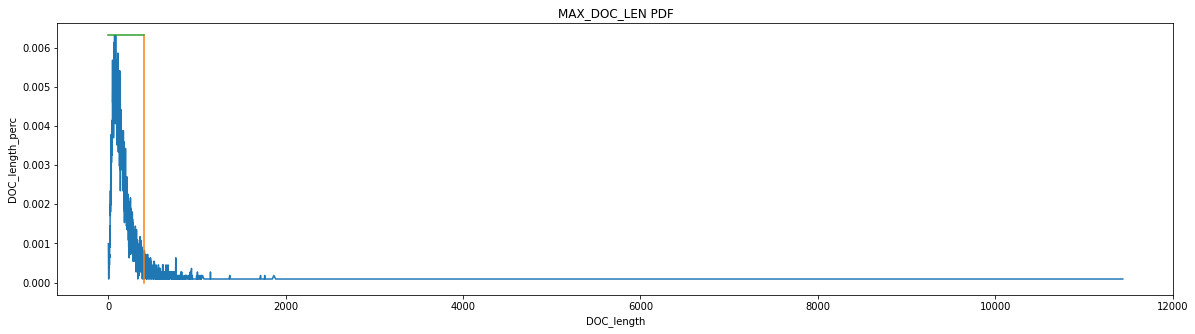

Cut index with 90.0 % of corpus:  405


In [5]:
####################################
### hyper params 
####################################
filters = '"#$%&()*+,-/:;<=>@[\\]^_`{|}~\t\n0123465789!.?\''
MAX_NB_WORDS_ratio = 0.90
MAX_DOC_LEN_ratio = 0.90
MAX_NB_WORDS = eda_MAX_NB_WORDS(train_text, ratio=MAX_NB_WORDS_ratio, char_level=False, filters=filters)
MAX_DOC_LEN = eda_MAX_DOC_LEN(train_text, ratio=MAX_DOC_LEN_ratio, char_level=False, filters=filters)

In [6]:
# X_train, X_test, word_to_idx, tfidf_vect = tfidf_vectorizer(train_text, test_text, stop_words=True, binary=True, min_df=5)
# X_train, transform_mapper = dimension_reduction(X_train, out_dim=1000) # not allow negative 
# X_test = transform_mapper.transform(X_test)

## extra one-hot features

In [7]:
# one_hot_X_train, one_hot_X_test, one_hot_word_to_idx, one_hot_count_vect = count_vectorizer(
#     train['Subject']+" " + train['Organization'], test['Subject']+" " + test['Organization'], stop_words=True, binary=False, min_df=3, max_df=0.001)

## extra keywords

In [8]:
# label_docs = train.groupby('label')['text'].apply(lambda x: " ".join(x)) # 要去除标点符号
# dtm, _, label_word_to_idx, _ = count_vectorizer(label_docs, [''], stop_words=True, min_df=1, binary=True)
# label_idx_to_word = dict([val, key] for key, val in label_word_to_idx.items())
# keywords_threshold = 1
# keywords_idx = np.where(dtm.sum(axis=0)<=keywords_threshold)[0]
# print(" keywords_idx shape: ")
# voc = [label_idx_to_word[idx] for idx in keywords_idx]

# keywords_X_train, keywords_X_test, keywords_word_to_idx, keywords_count_vect = count_vectorizer(
#     train['text'], test['text'], voc=voc, stop_words=True, min_df=1, binary=True)

In [9]:
# _X_train = np.hstack([X_train])
# _X_test = np.hstack([X_test])
# _X_train = np.hstack([X_train, one_hot_X_train, keywords_X_train])
# _X_test = np.hstack([X_test, one_hot_X_test, keywords_X_test])

# BERT

In [10]:
!pip install transformers
!pip install torchinfo
import torch
import torch.nn.functional as F

from torchinfo import summary
from transformers import BertTokenizer, BertModel, AdamW, BertConfig, get_linear_schedule_with_warmup, BertForSequenceClassification

from bert_utils.training_utils import extract_contextual_embedding, train_multi_label_model, model_eval
from bert_utils.data_loader import  data_loader_BERT
from bert_utils import glovar 
from bert_utils.model import *




     |████████████████████████████████| 3.3 MB 4.3 MB/s 
     |████████████████████████████████| 596 kB 66.1 MB/s 
     |████████████████████████████████| 895 kB 83.7 MB/s 
     |████████████████████████████████| 3.3 MB 45.8 MB/s 
     |████████████████████████████████| 61 kB 674 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Append path:  /content/drive/My Drive/Text-Classification/code/bert_utils
My Linux system:  Linux
using:  cuda
My Linux system:  Linux
using:  cuda


In [11]:
train_one_hot_labels = F.one_hot(torch.tensor(y_train.values))
test_one_hot_labels = F.one_hot(torch.tensor(test_label.values))

In [12]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained("bert-base-uncased", output_attentions = True, output_hidden_states = True)
# bert_model = BertForSequenceClassification.from_pretrained( "bert-base-uncased", num_labels=20, output_attentions=True, output_hidden_states=True,)
# global device
device = glovar.device_type
bert_model = bert_model.to(device)
print(next(bert_model.parameters()).device)  # 输出：cpu
summary(bert_model)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


cuda:0


Layer (type:depth-idx)                             Param #
BertModel                                          --
├─BertEmbeddings: 1-1                              --
│    └─Embedding: 2-1                              23,440,896
│    └─Embedding: 2-2                              393,216
│    └─Embedding: 2-3                              1,536
│    └─LayerNorm: 2-4                              1,536
│    └─Dropout: 2-5                                --
├─BertEncoder: 1-2                                 --
│    └─ModuleList: 2-6                             --
│    │    └─BertLayer: 3-1                         7,087,872
│    │    └─BertLayer: 3-2                         7,087,872
│    │    └─BertLayer: 3-3                         7,087,872
│    │    └─BertLayer: 3-4                         7,087,872
│    │    └─BertLayer: 3-5                         7,087,872
│    │    └─BertLayer: 3-6                         7,087,872
│    │    └─BertLayer: 3-7                         7,087,872
│    │   

In [13]:
load_embed= False
finetune = True

learning_rate = 0.00005
epochs = 10
patience = 60
MAX_DOC_LEN = 300
batch_size = 32


max_len = min(512, MAX_DOC_LEN)
label_size = 20
label_cols = labels
embed_dim = 768
hidden_units = 64
num_filters = 30
kernel_sizes = [1,2,3]
embed_type=3

In [14]:
if load_embed is True:
    train_sentences_encoding = np.load(f'train_sentences_encoding_{finetune}_{embed_type}.npy')# , mmap_mode='r')
    train_input_ids = np.load(f'train_input_ids_{finetune}_{embed_type}.npy')#, mmap_mode='r')
    train_sentences_encoding = torch.tensor(train_sentences_encoding)
    train_input_ids = torch.tensor(train_input_ids)
else:
    train_input_ids, train_sentences_encoding, train_attention_masks = extract_contextual_embedding(train_text, tokenizer, bert_model, finetune=finetune, max_len = max_len, low_RAM_inner_batch=True, embed_type=embed_type)
    # train_input_ids, train_sentences_encoding = extract_contextual_embedding(train_text.iloc[1:3], tokenizer, bert_model, max_len = max_len, low_RAM_inner_batch=False) test
    np.save(f'train_sentences_encoding_{finetune}_{embed_type}.npy', train_sentences_encoding)
    np.save(f'train_input_ids_{finetune}_{embed_type}.npy', train_input_ids)

## for finetune version train_sentences_encoding is the attention mask
dataloader, validation_dataloader = data_loader_BERT(train_sentences_encoding, train_input_ids, train_attention_masks, train_one_hot_labels, 
                                                                                            batch_size, random_state=1234, test_size=0.1)
del train_sentences_encoding, train_input_ids

In [15]:

model_path = 'bert_clf_85.pt'
label_size = len(labels)


if finetune:
    model = clf_finetuneBERT(freeze_bert=False, num_classes=label_size, hidden_units=hidden_units)
    # dataloader 会不一样
else:    
    # model = lstm_cnn_o1(embed_dim, max_len, hidden_units, num_filters, kernel_sizes, label_size)
    # model = lstm_cnn_o2(embed_dim, max_len, hidden_units, num_filters, kernel_sizes, label_size)
    # model = clf(embed_dim, max_len, hidden_units, label_size)
    model = clf_naive(embed_dim, max_len, hidden_units, label_size, dropout_rate=0.0)    

model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


clf_finetuneBERT(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=T

In [16]:
[torch.cuda.empty_cache() for _ in range(10) ]
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |     837 MB |     837 MB |     837 MB |       0 B  |
|       from large pool |     836 MB |     836 MB |     836 MB |       0 B  |
|       from small pool |       1 MB |       1 MB |       1 MB |       0 B  |
|---------------------------------------------------------------------------|
| Active memory         |     837 MB |     837 MB |     837 MB |       0 B  |
|       from large pool |     836 MB |     836 MB |     836 MB |

cuda

======== Epoch 1 / 10 ========
Training...
    Epoch 1	 Train Loss: 2.3948	 Train Acc: 0.6956	 Train F1: 0.6164	 Train ovr AUC: 0.9101	 Train precision: 0.6053	 Train recall: 0.6719
    Epoch 1	 Val Loss: 2.4135	 Val Acc: 0.6781	 Val F1: 0.5995	 Val ovr AUC: 0.8957	 Val precision: 0.5895	 Val recall: 0.6562
model saved

======== Epoch 2 / 10 ========
Training...
    Epoch 2	 Train Loss: 2.3202	 Train Acc: 0.7595	 Train F1: 0.7211	 Train ovr AUC: 0.9144	 Train precision: 0.7137	 Train recall: 0.7428
    Epoch 2	 Val Loss: 2.3434	 Val Acc: 0.7358	 Val F1: 0.7005	 Val ovr AUC: 0.9022	 Val precision: 0.7083	 Val recall: 0.7211
model saved

======== Epoch 3 / 10 ========
Training...
    Epoch 3	 Train Loss: 2.2858	 Train Acc: 0.7928	 Train F1: 0.7622	 Train ovr AUC: 0.9275	 Train precision: 0.7637	 Train recall: 0.7766
    Epoch 3	 Val Loss: 2.3210	 Val Acc: 0.7583	 Val F1: 0.7351	 Val ovr AUC: 0.9151	 Val precision: 0.7432	 Val recall: 0.7469
model saved

======== Epoch 4 / 10 ======

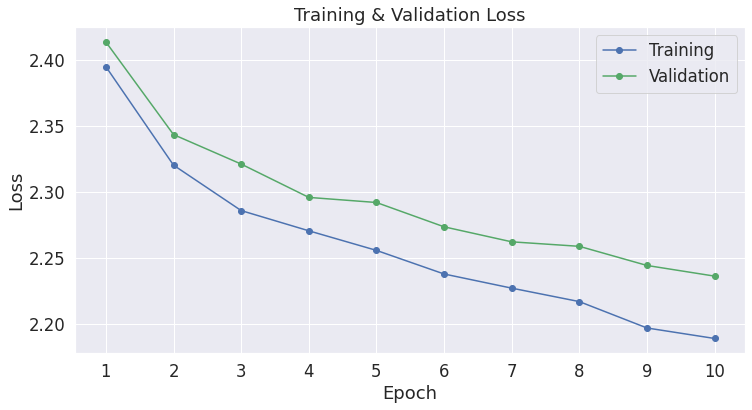

In [17]:
# Data Loader

optimizer = AdamW(model.parameters(), lr=learning_rate, eps=1e-8)
total_steps = len(dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=int(total_steps * 0.1), num_training_steps=total_steps)


model, training_stats, pred_labels, true_labels = train_multi_label_model(model, label_size, label_cols, dataloader, validation_dataloader, finetune=finetune, optimizer=optimizer, scheduler=scheduler, epochs=epochs, patience=patience, model_path=model_path)


pd.set_option('precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')
df_stats.to_csv(model_path[0:-2] + 'csv')

import seaborn as sns
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12, 6)
plt.plot(df_stats['train_loss'], 'b-o', label="Training")
plt.plot(df_stats['val_loss'], 'g-o', label="Validation")
plt.legend()
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(list(range(1, epochs + 1)))
plt.show()

In [18]:
# model.load_state_dict(torch.load(model_path))
[torch.cuda.empty_cache() for _ in range(10) ]
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |    2098 MB |    7985 MB |  168887 GB |  168885 GB |
|       from large pool |    2095 MB |    7978 MB |  168826 GB |  168824 GB |
|       from small pool |       3 MB |      31 MB |      60 GB |      60 GB |
|---------------------------------------------------------------------------|
| Active memory         |    2098 MB |    7985 MB |  168887 GB |  168885 GB |
|       from large pool |    2095 MB |    7978 MB |  168826 GB |

In [19]:
if load_embed is True:
    
    test_sentences_encoding = np.load(f'test_sentences_encoding_{finetune}_{embed_type}.npy')#, mmap_mode='r')
    test_input_ids = np.load(f'test_input_ids_{finetune}_{embed_type}.npy') # , mmap_mode='r')
    test_sentences_encoding = torch.tensor(test_sentences_encoding)
    test_input_ids = torch.tensor(test_input_ids)
else:
    test_input_ids, test_sentences_encoding, test_attention_masks = extract_contextual_embedding(test_text, tokenizer, bert_model, finetune=finetune, max_len = max_len, low_RAM_inner_batch=True, embed_type=embed_type)
    np.save(f'test_sentences_encoding_{finetune}_{embed_type}.npy', test_sentences_encoding)
    np.save(f'test_input_ids_{finetune}_{embed_type}.npy', test_input_ids)


test_dataloader, _ = data_loader_BERT(test_sentences_encoding,test_input_ids, test_attention_masks, test_one_hot_labels, batch_size=batch_size, testing=True)
del test_sentences_encoding, test_input_ids

tokenized_texts, pred_labels, true_labels, avg_val_loss, auc_score, precison, recall, acc, f1 = model_eval(model, test_dataloader,  labels , finetune=finetune, class_weight=None)
classification_report = evaluation_report(np.argmax(true_labels, axis=1),  np.argmax(pred_labels, axis=1), labels=labels)
roc_auc(y_test, pred_labels)

classification_report:
f1:  {'micro avg': 0.7968045354980028, 'macro avg': 0.7730777473532747} 

                          precision  recall  f1-score  support
alt.atheism                    0.68    0.70      0.69    319.0
comp.graphics                  0.79    0.71      0.75    389.0
comp.os.ms-windows.misc        0.83    0.73      0.78    394.0
comp.sys.ibm.pc.hardware       0.58    0.76      0.66    392.0
comp.sys.mac.hardware          0.70    0.69      0.69    385.0
comp.windows.x                 0.89    0.81      0.85    395.0
misc.forsale                   0.80    0.91      0.85    390.0
rec.autos                      0.90    0.85      0.87    395.0
rec.motorcycles                0.88    0.86      0.87    398.0
rec.sport.baseball             0.89    0.92      0.90    397.0
rec.sport.hockey               0.98    0.93      0.96    827.0
sci.crypt                      0.93    0.88      0.90    396.0
sci.electronics                0.77    0.77      0.77    393.0
sci.med              

In [20]:
import re
from collections import Counter
import pandas as pd
import torch
from sklearn.model_selection import train_test_split  # , StratifiedKFold
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import numpy as np


In [21]:
df_stats

,train_loss,train_acc,val_loss,val_acc,val F1 macro,val ovr AUC,val precison,val recall,Best epoch,Training Time,Validation Time
epoch,,,,,,,,,,,
1,2.39,0.70,2.41,0.68,0.60,0.90,0.59,0.66,0,0:05:14,0:00:12
2,2.32,0.76,2.34,0.74,0.70,0.90,0.71,0.72,1,0:05:14,0:00:12
3,2.29,0.79,2.32,0.76,0.74,0.92,0.74,0.75,2,0:05:14,0:00:12
4,2.27,0.81,2.30,0.78,0.76,0.92,0.76,0.77,3,0:05:14,0:00:12
5,2.26,0.82,2.29,0.79,0.77,0.91,0.78,0.78,4,0:05:14,0:00:12
6,2.24,0.84,2.27,0.81,0.78,0.92,0.78,0.79,4,0:05:14,0:00:12
7,2.23,0.85,2.26,0.82,0.79,0.93,0.79,0.81,6,0:05:14,0:00:12
8,2.22,0.86,2.26,0.82,0.80,0.93,0.84,0.81,7,0:05:14,0:00:12
9,2.20,0.88,2.24,0.83,0.82,0.95,0.83,0.82,7,0:05:14,0:00:12
